# Title

Here's a [question from the Reddit statistics forum](https://www.reddit.com/r/AskStatistics/comments/1ddgpqr/comment/l860puz/?context=3).

> 



Intro

Update the link...

[Click here to run this notebook on Colab](https://colab.research.google.com/github/AllenDowney/DataQnA/blob/main/nb/normality.ipynb).

I'll download a utilities module with some of my frequently-used functions, and then import the usual libraries.

In [1]:
from os.path import basename, exists

def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(url, filename)
        print("Downloaded " + str(local))
    return filename

download('https://github.com/AllenDowney/DataQnA/raw/main/nb/utils.py')

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from utils import decorate

In [2]:
# install the empiricaldist library, if necessary

try:
    import empiricaldist
except ImportError:
    !pip install empiricaldist

## Answer

In [3]:
from scipy.stats import lognorm

def make_lognormal(m, s, loc=0):
    scale = np.exp(m)
    dist = lognorm(s=s, loc=loc, scale=scale)
    return dist

In [4]:
dist1 = make_lognormal(1, 0.1)
dist1.mean(), dist1.std()

(2.731907272825927, 0.2738751291058153)

In [5]:
np.random.seed(17)

n = 1000
group1 = dist1.rvs(n)

In [6]:
from scipy.stats import norm
from empiricaldist import Cdf

def plot_normal(data, low, high, **options):
    mean = np.mean(data)
    std = np.std(data)

    xs = np.linspace(low, high)
    ps = norm(mean, std).cdf(xs)

    plt.plot(xs, ps, color='gray', alpha=0.5)
    Cdf.from_seq(data).plot(**options)
    decorate(xlabel='x', ylabel='Density')

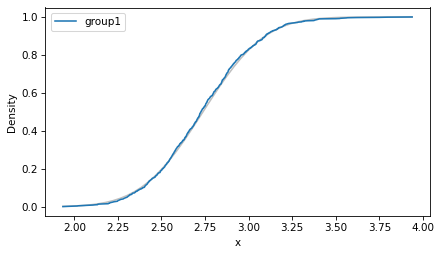

In [7]:
low, high = np.min(group1), np.max(group1)
plot_normal(group1, low, high, label='group1')

In [8]:
dist2 = make_lognormal(1, 1)
dist2.mean(), dist2.std()

(4.4816890703380645, 5.874743663340262)

In [9]:
np.random.seed(17)

n = 1000
group2 = dist2.rvs(n)

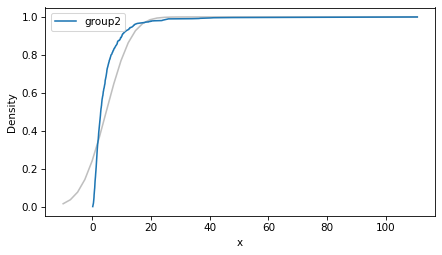

In [10]:
low, high = np.min(group2), np.max(group2)
plot_normal(group2, -10, high, label='group2')

In [11]:
from scipy.stats import kstest

def kswrapper(data):
    return kstest(data, 'norm', args=(np.mean(data), np.std(data)))

In [14]:
from scipy.stats import shapiro
from scipy.stats import anderson

def run_tests(data):
    _, p_value_shapiro = shapiro(data)
    
    _, p_value_ks = kswrapper(data)

    res = anderson(data, dist='norm')
    p_values = pd.Series(res.critical_values, res.significance_level)
    reject = res.statistic > p_values[5]
    
    return p_value_shapiro, p_value_ks, reject

In [15]:
run_tests(group1)

(0.0009716294788435253, 0.632227963227574, False)

In [16]:
run_tests(group2)

(2.2562386742346162e-46, 3.673585212945718e-56, True)

In [17]:
columns = ['Shapiro-Wilk', 'Kolmogorov-Smirnov', 'Anderson-Darling']

def run_sizes(ns, s):
    dist = make_lognormal(1, s)

    res = []
    for n in ns:
        data = dist.rvs(n)
        res.append(run_tests(data))

    results = pd.DataFrame(res, columns=columns)
    results.index = ns
    return results

In [18]:
s = 0.1
ns = np.arange(10, 3000, 50)

np.random.seed(17)
results = run_sizes(ns, s)
results

,Shapiro-Wilk,Kolmogorov-Smirnov,Anderson-Darling
10,9.735041e-01,0.980859,False
60,1.338847e-02,0.817493,False
110,4.208248e-01,0.904419,False
160,2.215651e-01,0.756128,False
210,1.021039e-01,0.806706,False
260,1.201588e-01,0.849872,False
310,2.295296e-01,0.707184,False
360,6.875946e-03,0.253389,True
410,7.821671e-02,0.436136,True
460,6.451423e-01,0.626205,False


In [19]:
from utils import plot_series_lowess

colors = ['C0', 'C1', 'C2']

def plot_results(results):
    for i, column in enumerate(results.columns):
        if i < 2:
            series = np.log10(results[column])
            plot_series_lowess(series, colors[i], label='column')

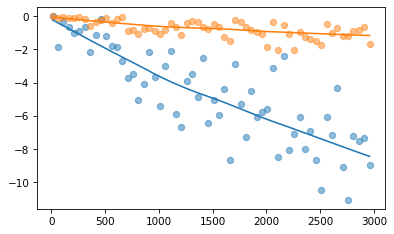

In [20]:
plot_results(results)

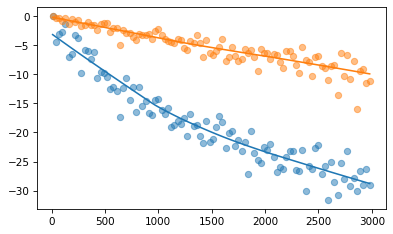

In [21]:
s = 0.3
ns = np.arange(10, 3000, 30)

np.random.seed(17)
results = run_sizes(ns, s)
plot_results(results)

In [22]:
def random_walk(s, func):
    dist = make_lognormal(1, s)
    n = 100
    ns = []

    for i in range(1000):
        ns.append(n)
        data = dist.rvs(n)
        _, p_value = func(data)
        if p_value > 0.5:
            n += 10
        else:
            n = max(n-10, 10)
                
    return ns

38.62

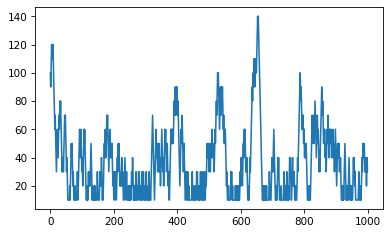

In [23]:
ns = random_walk(0.1, shapiro)
plt.plot(ns)
np.mean(ns[500:])

470.96

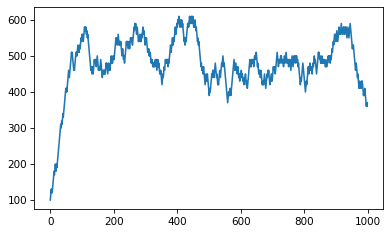

In [24]:
ns = random_walk(0.1, kswrapper)
plt.plot(ns)
np.mean(ns[500:])

In [25]:
def find_critical_size(s, func):
    ns = random_walk(s, func)
    return np.mean(ns[500:])

In [26]:
def sweep_s(func):
    res = []
    for s in np.linspace(0.1, 1.0, 10):
        n_crit = find_critical_size(s, func)
        res.append((s, n_crit))
    return res

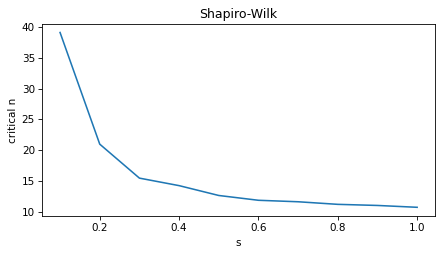

In [27]:
res = sweep_s(shapiro)
s, n = np.transpose(res)
plt.plot(s, n)
decorate(xlabel='s', ylabel='critical n', title='Shapiro-Wilk')

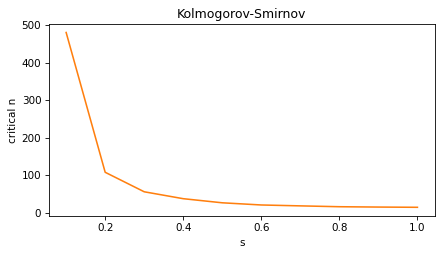

In [28]:
res = sweep_s(kswrapper)
s, n = np.transpose(res)
plt.plot(s, n, color='C1')
decorate(xlabel='s', ylabel='critical n', title='Kolmogorov-Smirnov')

## Discussion

[*Data Q&A: Answering the real questions with Python*](https://allendowney.github.io/DataQnA/index.html)

Copyright 2024 [Allen B. Downey](https://allendowney.com)

License: [Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International](https://creativecommons.org/licenses/by-nc-sa/4.0/)